In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import vincent

import seaborn as sns

Before doing any analysis, we hypothesized that the following types of features will affect pricing:
* Property/Room Type
* Size - (# of bathrooms, # of bedrooms, # of beds, how many people the room can accomodate). The larger the size, the more expensive the place would be.
* Location - the specific city/neighborhood the place would be in. In addition, the closer the area is to central parts of the city, the more expensive the rental would be. 
* How "nice" the place is. Features that are helpful for suggesting how nice a place is include: description of the place, name of the listing, the picture, the review scores rating, and amenities

There are other factors whose effect on pricing is harder to know ahead of time. We also believe that these factors will be overshadowed by the above factors (i.e. whether a host has profile picture or not will not significantly impact higher price given the room's quality, but it may impact whether I bother to check out the room). 
* first and last review - this may not suggest how good or bad a room is. However, if it has been a long time since the last review, perhaps this could indicate bad room quality. However, more definitive data, such as the actual review, or how often the room has been booked, would be more helpful.
* cancellation policy - it's possible that the stricter the policy, the more disciplined the host, and therefore the more likely that the room is of higher quality. But it is also possible that the more flexible the policy, the more the host has to cover for losses due to last minute changes, and the higher the price of the room to absorb losses
* host_has_profile_pic / host_identity_verified - If a host has a profile picture and has identify verified, perhaps they appear more trustworthy and can charge more, but not sure
* host response rate: if host has higher response rate, perhaps they are more attentive and disciplined and maintains a nicer room, and can charge more. But the relationship might be weak.
* host since: the longer the person has been a host, the more experience they have, and perhaps they're better able to gage the max price to charge. 
* number of reviews: it's expected that the more reviews, the more popular the property is

In [3]:
train = pd.read_csv('train.csv', encoding = "ISO-8859-1")

In [4]:
# Take inverse of natural log
train['price'] = np.exp(train['log_price'])

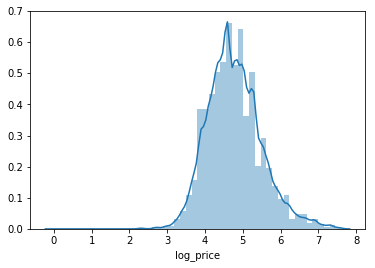

In [19]:
# What is the price distribution?
sns.distplot(train['log_price'].dropna())

In [20]:
# Average price
train['price'].mean() 

160.37084913170784

### Examining Property Type

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Condominium'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Loft'),
 Text(0,0,'Other'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Villa'),
 Text(0,0,'Dorm'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Camper/RV'),
 Text(0,0,'Timeshare'),
 Text(0,0,'Cabin'),
 Text(0,0,'In-law'),
 Text(0,0,'Hostel'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Boat'),
 Text(0,0,'Serviced apartment'),
 Text(0,0,'Tent'),
 Text(0,0,'Castle'),
 Text(0,0,'Vacation home'),
 Text(0,0,'Yurt'),
 Text(0,0,'Hut'),
 Text(0,0,'Treehouse'),
 Text(0,0,'Chalet'),
 Text(0,0,'Earth House'),
 Text(0,0,'Tipi'),
 Text(0,0,'Cave'),
 Text(0,0,'Train'),
 Text(0,0,'Island'),
 Text(0,0,'Casa particular'),
 Text(0,0,'Parking Space'),
 Text(0,0,'Lighthouse')]

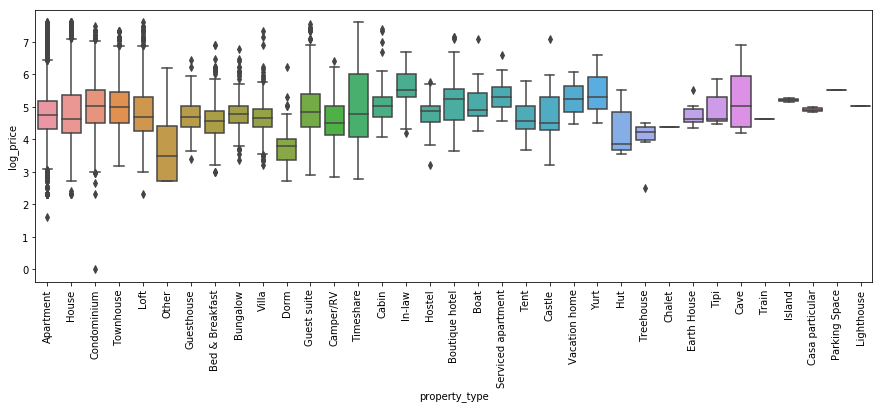

In [24]:
property = train['property_type'].value_counts().index.unique()
fig, ax = plt.subplots(figsize=(15, 5))
#g = sns.violinplot(x="property_type", y="price", orient='v', data=train)
g = sns.boxplot(x="property_type", y="log_price", orient='v', data=train)
g.set_xticklabels(property, rotation=90)

Apartment, house, condo, townhouse, loft, guest suite, and timeshare have a wide range of outliers that have prices much higher than the average. Places such as in-law, boutique hotel, serviced apartment, boat, castle, vacation home, yurt, and cave have either an average or price range that is above the total average. "Other", dorm, and hut, as expected, have lower than average prices.

[Text(0,0,'Entire home/apt'),
 Text(0,0,'Private room'),
 Text(0,0,'Shared room')]

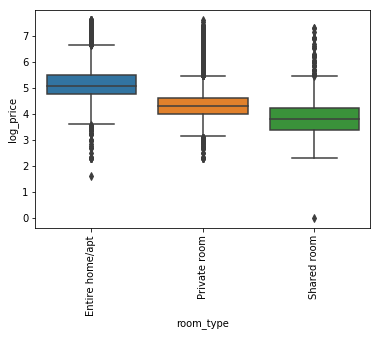

In [29]:
roomtype = train['room_type'].value_counts().index.unique()
g = sns.boxplot(x="room_type", y="log_price", orient='v', data=train)
g.set_xticklabels(roomtype, rotation=90)

[Text(0,0,'Real Bed'),
 Text(0,0,'Futon'),
 Text(0,0,'Pull-out Sofa'),
 Text(0,0,'Airbed'),
 Text(0,0,'Couch')]

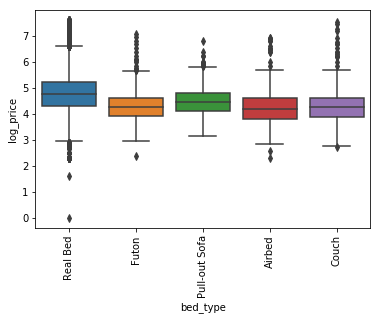

In [30]:
bedtype = train['bed_type'].value_counts().index.unique()
g = sns.boxplot(x="bed_type", y="log_price", orient='v', data=train)
g.set_xticklabels(bedtype, rotation=90)

### Examining Size Factors

In [ ]:
(# of bathrooms, # of bedrooms, # of beds, how many people the room can accomodate

[Text(0,0,'0.0'),
 Text(0,0,'0.5'),
 Text(0,0,'1.0'),
 Text(0,0,'1.5'),
 Text(0,0,'2.0'),
 Text(0,0,'2.5'),
 Text(0,0,'3.0'),
 Text(0,0,'3.5'),
 Text(0,0,'4.0'),
 Text(0,0,'4.5'),
 Text(0,0,'5.0'),
 Text(0,0,'5.5'),
 Text(0,0,'6.0'),
 Text(0,0,'6.5'),
 Text(0,0,'7.0'),
 Text(0,0,'7.5'),
 Text(0,0,'8.0')]

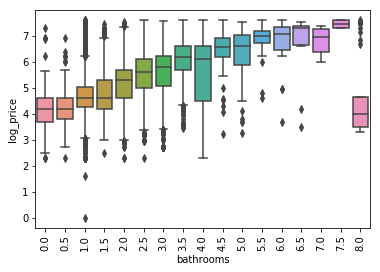

In [40]:
bathrooms = sorted(train['bathrooms'].value_counts().index.unique())
g = sns.boxplot(x="bathrooms", y="log_price", orient='v', data=train)
g.set_xticklabels(bathrooms, rotation=90)

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0')]

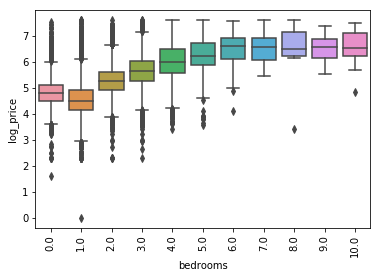

In [39]:
bedrooms = sorted(train['bedrooms'].value_counts().index.unique())
g = sns.boxplot(x="bedrooms", y="log_price", orient='v', data=train)
g.set_xticklabels(bedrooms, rotation=90)

After 6 bedrooms, it looks like adding more bedrooms does not increase price further

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0'),
 Text(0,0,'16.0'),
 Text(0,0,'18.0')]

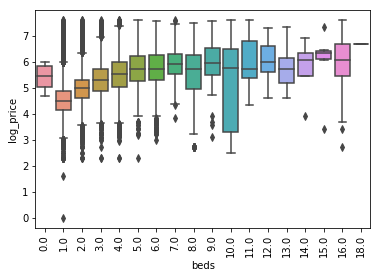

In [44]:
beds = sorted(train['beds'].value_counts().index.unique())
g = sns.boxplot(x="beds", y="log_price", orient='v', data=train)
g.set_xticklabels(beds, rotation=90)

It looks like after 5 beds, the price does not increase much

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16')]

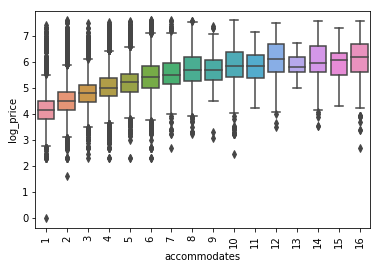

In [43]:
accommodates = sorted(train['accommodates'].value_counts().index.unique())
g = sns.boxplot(x="accommodates", y="log_price", orient='v', data=train)
g.set_xticklabels(accommodates, rotation=90)

The more people that can be accommodated, the higher the price

### Location

[Text(0,0,'Boston'),
 Text(0,0,'Chicago'),
 Text(0,0,'DC'),
 Text(0,0,'LA'),
 Text(0,0,'NYC'),
 Text(0,0,'SF')]

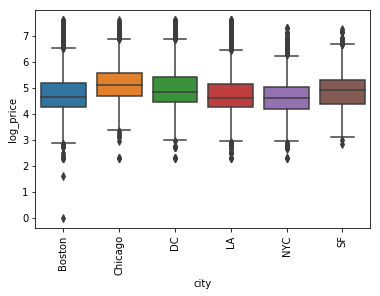

In [45]:
city = sorted(train['city'].value_counts().index.unique())
g = sns.boxplot(x="city", y="log_price", orient='v', data=train)
g.set_xticklabels(city, rotation=90)

##### New York City

In [33]:
neighbor_group = train['log_price'].groupby(train[train['city']=='NYC']['neighbourhood']).agg({'mean': np.mean})

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [37]:
# top 10 most expensive in NYC
neighbor_group.sort_values(['mean'], ascending=False)[0:10]

,mean
neighbourhood,
Mill Basin,6.214608
Emerson Hill,6.138033
Graniteville,5.703782
Noho,5.619347
Castleton Corners,5.594711
Todt Hill,5.521461
Tribeca,5.501281
Rossville,5.501258
Union Square,5.487270


In [40]:
# top 10 least expensive in NYC
neighbor_group.sort_values(['mean'], ascending=False)[-11:-1]

,mean
neighbourhood,
Allerton,3.988391
Soundview,3.981600
East Elmhurst,3.965400
Concord,3.919369
Utopia,3.903668
Hunts Point,3.864704
Mount Eden,3.818311
Eltingville,3.814484
Park Versailles,3.800757


##### Boston

In [41]:
neighbor_group = train['log_price'].groupby(train[train['city']=='Boston']['neighbourhood']).agg({'mean': np.mean})

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [42]:
# top 10 most expensive in Boston
neighbor_group.sort_values(['mean'], ascending=False)[0:10]

,mean
neighbourhood,
Cambridge,5.755211
Downtown,5.481092
Harvard Square,5.480639
Coolidge Corner,5.416100
Chinatown,5.409718
Financial District,5.361982
West End,5.360375
Government Center,5.357209
Leather District,5.340869


In [43]:
# top 10 least expensive in Boston
neighbor_group.sort_values(['mean'], ascending=False)[-11:-1]

,mean
neighbourhood,
Newton,4.605170
Roxbury,4.602915
West Roxbury,4.526641
Dorchester,4.428955
Allston-Brighton,4.416305
Roslindale,4.377333
Hyde Park,4.299289
Chestnut Hill,4.292139
Winthrop,4.231898


##### Washington DC

In [44]:
neighbor_group = train['log_price'].groupby(train[train['city']=='DC']['neighbourhood']).agg({'mean': np.mean})

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [45]:
# top 10 most expensive in DC
neighbor_group.sort_values(['mean'], ascending=False)[0:10]

,mean
neighbourhood,
"Chevy Chase, MD",7.130899
Observatory Circle,6.715383
Skyland,5.959195
Bellevue,5.905828
Mt. Vernon Square,5.733341
Judiciary Square,5.642381
Downtown/Penn Quarter,5.612243
Gateway,5.590994
"Chillum, MD",5.480639


In [46]:
# top 10 least expensive in DC
neighbor_group.sort_values(['mean'], ascending=False)[-11:-1]

,mean
neighbourhood,
Hillbrook,4.134366
Barry Farm,4.094345
Near Northeast,4.094345
"Hilcrest Heights/Marlow Heights, MD",4.007333
Deanwood,3.979516
Eastland Gardens,3.918583
Lincoln Heights,3.844228
Benning Heights,3.772977
Garfield Heights,3.688879


##### San Francisco

In [47]:
neighbor_group = train['log_price'].groupby(train[train['city']=='SF']['neighbourhood']).agg({'mean': np.mean})

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [48]:
# top 10 most expensive in SF
neighbor_group.sort_values(['mean'], ascending=False)[0:10]

,mean
neighbourhood,
Sea Cliff,6.259786
Fisherman's Wharf,5.636962
Presidio,5.575024
Financial District,5.559753
Marina,5.542516
Cow Hollow,5.515461
Russian Hill,5.500486
Presidio Heights,5.495851
Pacific Heights,5.439049


In [49]:
# top 10 least expensive in SF
neighbor_group.sort_values(['mean'], ascending=False)[-11:-1]

,mean
neighbourhood,
Mission Terrace,4.836351
Lakeshore,4.798245
Oceanview,4.782703
Ingleside,4.762324
West Portal,4.759170
Crocker Amazon,4.745251
Portola,4.722237
Bayview,4.704966
Visitacion Valley,4.674289


##### Los Angeles

In [50]:
neighbor_group = train['log_price'].groupby(train[train['city']=='LA']['neighbourhood']).agg({'mean': np.mean})

C:\Users\hanzhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [51]:
# top 10 most expensive in LA
neighbor_group.sort_values(['mean'], ascending=False)[0:10]

,mean
neighbourhood,
Wilmington,7.170120
Malibu,5.926612
Palos Verdes,5.795321
Bel Air/Beverly Crest,5.739820
Pacific Palisades,5.633626
West Athens,5.593944
Laurel Canyon,5.533759
Manhattan Beach,5.434295
Hermosa Beach,5.370424


In [52]:
# top 10 least expensive in LA
neighbor_group.sort_values(['mean'], ascending=False)[-11:-1]

,mean
neighbourhood,
West Puente Valley,3.935828
Covina,3.929984
Irwindale,3.912023
Santa Fe Springs,3.912023
Artesia,3.912023
Gardena,3.862413
Montebello,3.830514
South El Monte,3.824846
Norwalk,3.811883


### Other Features

In [53]:
train['amenities'].isnull().sum()

0